# Mentoría Ciencia de datos aplicada a la predicción de licencias médicas y comportamiento de los colaboradores

# Trabajo Práctico 1: Análisis y Visualización de Datos

Trabajar con el csv denominado data.csv y resolver las siguientes consignas:

1) ¿Cuáles son las columnas relevantes del dataset?
2) ¿Qué tipo de variable es cada una? Asegurar que tengan el tipo de datos adecuado. Por ejemplo, para el caso de las fechas usar libreria datetime para su conversión.
3) Exploren si hay valores faltantes y/o nulos en el dataset.
4) A partir de la fecha de nacimiento calcular la edad del colaborador que solicita la licencia. 

5) ¿Existen outliers en las variables seleccionadas?
6) Realicen un análisis estadístico de cada una de las variables numéricas: Cantidad de datos, mínimo, máximo, media, mediana, varianza, desviación estándar, cuartil 1, cuartil 3, rango intercuartílico.

    6.A) Elijan una o dos variables categóricas, repetir este análisis y sacar conclusiones.
    
    6.B) ¿El tiempo es una variable influyente en las distribuciones de estas variables? Ayudarse de gráficos para contestar esta pregunta. 
    
7) Representen gráficamente cada variable numérica eligiendo el gráfico que considere apropiado. Consideren la posibilidad de generar rangos de datos para su análisis y representación gráfica de las variables. 

    7.A) Repitan los gráficos agrupando por una o dos variables categóricas y sacar conclusiones.
    
8) Presenten una tabla de frecuencias y porcentajes para las variables categóricas estado civil y edad.
9) Realicen un gráfico para representar la tabla construida en el punto 7.
10) En todas las consignas saquen conclusiones de lo observado. 

## Carga del dataset

Se carga el dataset de solicitudes de licencias médicas.

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

url = 'https://raw.githubusercontent.com/MentoriaDiploDatos/Presentacion/main/data.csv'
df = pd.read_csv(url, sep=';')

/tmp/ipykernel_51027/647660307.py:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=';')


## 1. Columnas relevantes

Se seleccionan las columnas del dataset relevantes para el siguiente planteo:

> ¿existe un sobredimensionamiento en la cantidad de días solicitados en las licencias médicas?

Asociado a este planteo, se presume que la dimensión temporal va a ser relevante por lo que también se incluirán columnas de fecha en el análisis.

### a) Exploración inicial del dataset

Se realiza una primer exploración del dataset para conocer su estructura:
 - dimensión (filas y columnas)
 - filas de ejemplo

In [11]:
df.shape

(430081, 18)

In [12]:
df.head(5)

,numero_licencia,fecha_creacion,dispositivo_acceso,dias_solicitados,fecha_inicio,fecha_fin,diagnostico,id_diagnostico,id_usuario,fecha_nacimiento,genero,tipo_licencia,estado_civil,dias_aprobados,decision_medica,id_auditor,motivo_rechazo,categoria_diagnostico
0,1,2021-01-01 00:10:10.418,APP,2.0,2021-01-01,2021-01-01,EFECTOS ADVERSOS DE VACUNAS VIRALES,NaN,15508,1979-11-28,FEMALE,Médica,OTHER,2.0,EDITAR_Y_APROBAR,14721.0,NaN,NaN
1,105,2021-01-02 14:14:20.330,APP,2.0,2021-01-02,2021-01-03,EFECTOS ADVERSOS DE VACUNAS VIRALES,NaN,15508,1979-11-08,FEMALE,Médica,OTHER,2.0,EDITAR_Y_APROBAR,14721.0,NaN,NaN
2,113806,2021-08-26 09:32:09.396,APP,1.0,2021-08-26,2021-08-26,COLELITIASIS,NaN,3661,1980-10-25,FEMALE,Médica,SINGLE,0.0,RECHAZAR,14721.0,NaN,NaN
3,333787,2022-08-03 20:29:25.519,APP,1.0,2022-08-03,2022-08-03,LUMBAGO NO ESPECIFICADO. CONTRACTURA DORSAL IN...,22.0,11761,1986-12-01,MALE,Médica,SINGLE,1.0,EDITAR_Y_APROBAR,14721.0,Se aprueba la licencia,TRAUMATOLOGIA Y ORTOPEDIA
4,428763,2022-12-26 12:41:18.734,APP,2.0,2022-12-26,2022-12-27,COLITIS Y GASTROENTERITIS NO INFECCIOSAS,6.0,11761,1986-12-21,MALE,Médica,SINGLE,2.0,EDITAR_Y_APROBAR,14721.0,Se aprueba la licencia,GASTROINTESTINAL


### b) Selección de columnas relevantes

De las columnas listadas se seleccionan las siguientes:

In [122]:
# se crea un dataset con las columnas relevantes
relevant_columns = ['fecha_creacion', 'dias_solicitados', 'fecha_inicio', 'fecha_fin', 'diagnostico',
                    'id_diagnostico', 'fecha_nacimiento', 'genero', 'tipo_licencia', 'estado_civil', 
                    'dias_aprobados', 'decision_medica', 'id_auditor', 'motivo_rechazo', 'categoria_diagnostico']
relev_df = df[relevant_columns]
relev_df.head()

,fecha_creacion,dias_solicitados,fecha_inicio,fecha_fin,diagnostico,id_diagnostico,fecha_nacimiento,genero,tipo_licencia,estado_civil,dias_aprobados,decision_medica,id_auditor,motivo_rechazo,categoria_diagnostico
0,2021-01-01 00:10:10.418,2.0,2021-01-01,2021-01-01,EFECTOS ADVERSOS DE VACUNAS VIRALES,NaN,1979-11-28,FEMALE,Médica,OTHER,2.0,EDITAR_Y_APROBAR,14721.0,NaN,NaN
1,2021-01-02 14:14:20.330,2.0,2021-01-02,2021-01-03,EFECTOS ADVERSOS DE VACUNAS VIRALES,NaN,1979-11-08,FEMALE,Médica,OTHER,2.0,EDITAR_Y_APROBAR,14721.0,NaN,NaN
2,2021-08-26 09:32:09.396,1.0,2021-08-26,2021-08-26,COLELITIASIS,NaN,1980-10-25,FEMALE,Médica,SINGLE,0.0,RECHAZAR,14721.0,NaN,NaN
3,2022-08-03 20:29:25.519,1.0,2022-08-03,2022-08-03,LUMBAGO NO ESPECIFICADO. CONTRACTURA DORSAL IN...,22.0,1986-12-01,MALE,Médica,SINGLE,1.0,EDITAR_Y_APROBAR,14721.0,Se aprueba la licencia,TRAUMATOLOGIA Y ORTOPEDIA
4,2022-12-26 12:41:18.734,2.0,2022-12-26,2022-12-27,COLITIS Y GASTROENTERITIS NO INFECCIOSAS,6.0,1986-12-21,MALE,Médica,SINGLE,2.0,EDITAR_Y_APROBAR,14721.0,Se aprueba la licencia,GASTROINTESTINAL


## 2. Tipos de datos

Se analiza el tipo de datos de las columnas seleccionadas

In [59]:
relev_df.dtypes

fecha_creacion            object
dias_solicitados         float64
fecha_inicio              object
fecha_fin                 object
diagnostico               object
id_diagnostico           float64
fecha_nacimiento          object
genero                    object
tipo_licencia             object
estado_civil              object
dias_aprobados           float64
decision_medica           object
id_auditor               float64
motivo_rechazo            object
categoria_diagnostico     object
dtype: object

### a) Transformación de columnas de tipo fecha

Se comprueba que las variables de fecha tienen tipo *object*; se decide convertir dichas variables en tipo *datetime*.

In [63]:
relev_df['fecha_creacion'] = pd.to_datetime(relev_df['fecha_creacion'], format="%Y%m%d")
relev_df['fecha_inicio'] = pd.to_datetime(relev_df['fecha_inicio'])
relev_df['fecha_fin'] = pd.to_datetime(relev_df['fecha_fin'])
relev_df['fecha_nacimiento'] = pd.to_datetime(relev_df['fecha_nacimiento'])

relev_df.dtypes

fecha_creacion           datetime64[ns]
dias_solicitados                float64
fecha_inicio             datetime64[ns]
fecha_fin                datetime64[ns]
diagnostico                      object
id_diagnostico                  float64
fecha_nacimiento         datetime64[ns]
genero                           object
tipo_licencia                    object
estado_civil                     object
dias_aprobados                  float64
decision_medica                  object
id_auditor                      float64
motivo_rechazo                   object
categoria_diagnostico            object
dtype: object

### b) Tipos de variables

Las variables seleccionadas se dividen en:

- **categóricas nominales**: *diagnostico*, *genero*, *tipo_licencia*, *estado_civil*, *decision_medica*, *id_auditor*, *motivo_rechazo*, *id_diagnostico*, *categoria_diagnostico*
- **numéricas discretas**: *fecha_creacion*, *dias_solicitados*, *fecha_inicio*, *fecha_fin*, *fecha_nacimiento*, *dias_aprobados*

> Nota: las variables de tipo fecha podrían ser consideradas tanto de tipo discreto como de tipo continuo, sin embargo, serán consideradas como discretas.  

## 3. Valores faltantes y/o nulos

Se explora el dataset para buscar **valores faltantes** (datos que no se encuentran presentes en una variable o columna determinada, ya sea porque no se registraron o porque se perdieron).

In [21]:
# se identifican los valores nulos (None o NaN)
relev_df.isnull().sum()

fecha_creacion                0
dias_solicitados           6035
fecha_inicio                  0
fecha_fin                     1
diagnostico                   0
id_diagnostico           157021
fecha_nacimiento              0
genero                        0
tipo_licencia                 0
estado_civil                  0
dias_aprobados             3078
decision_medica            3078
id_auditor                 3079
motivo_rechazo           242267
categoria_diagnostico    158928
dtype: int64

<Axes: >

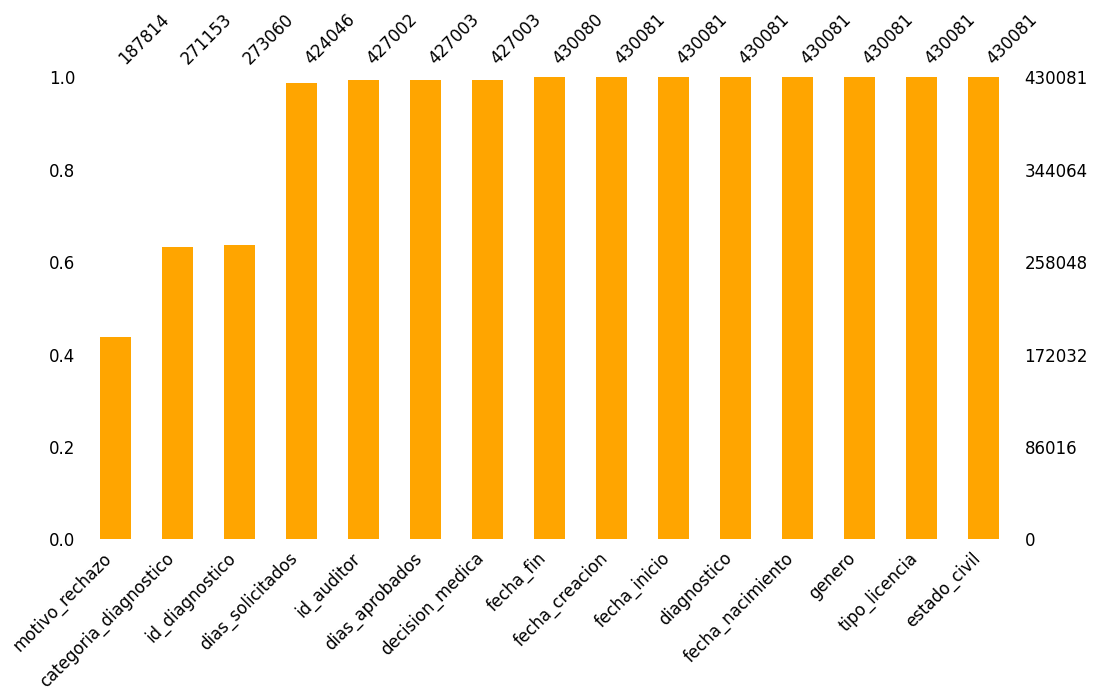

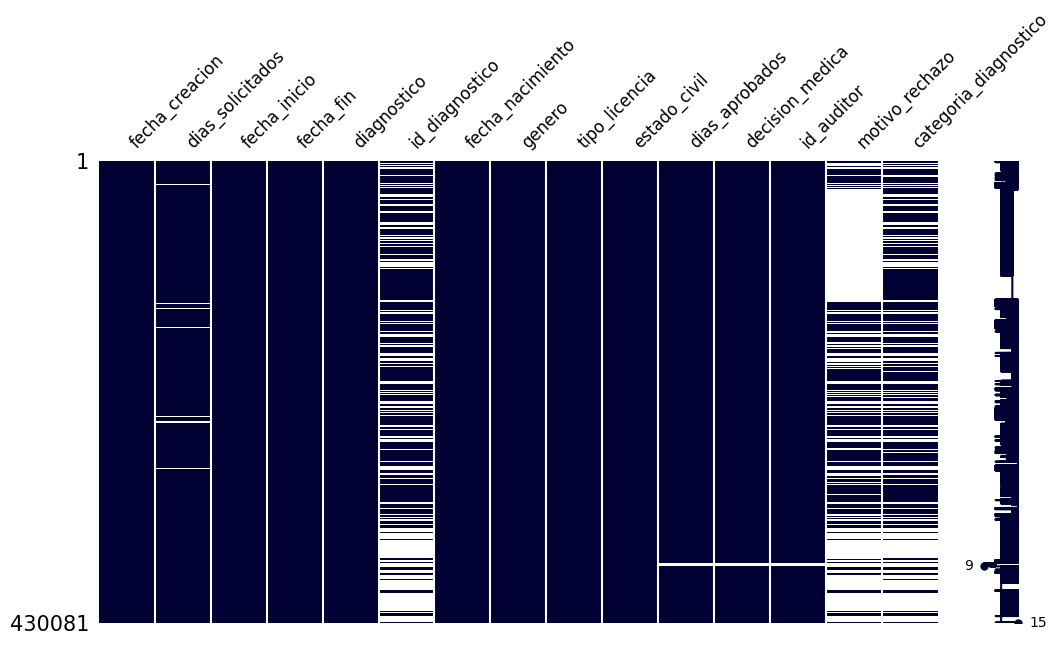

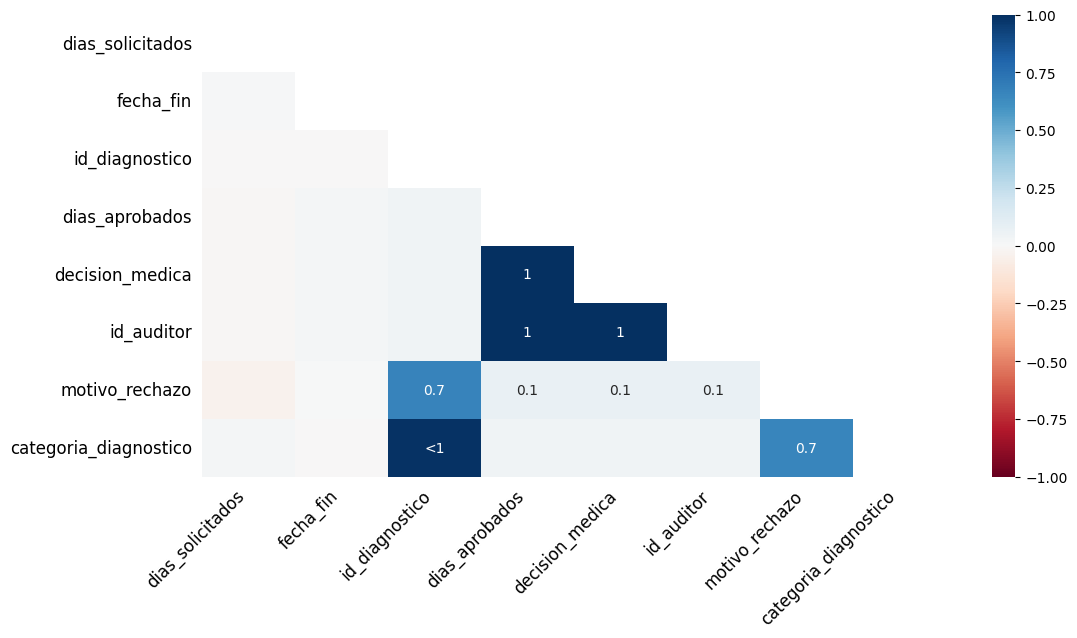

In [20]:
import missingno as msno

msno.bar(relev_df,figsize=(12, 6), sort="ascending",fontsize=12, color='orange')
msno.matrix(relev_df,figsize=(12, 6), fontsize=12, color=[0,0,0.2])
msno.heatmap(relev_df,figsize=(12, 6), fontsize=12)

El uso de la librería *missingno* nos revela valores faltantes en las siguientes columnas:

- fecha_fin
- decision_medica
- dias_aprobados
- id_auditor
- dias_solicitados
- id_diagnostico
- categoria_diagnostico
- motivo_rechazo

### a) Registros sin auditar

El análisis previo nos permite identificar un conjunto de variables con valores faltantes con una correlación total (corr=1). Estas variables son:

 - id_auditor
 - decision_medica
 - dias_aprobados

 Se observa que en el caso que un valor falta en una columna, falta en las otras; esto podría deberse a que los tres datos se completan cuando la solicitud es auditada; la ausencia de valores podría indicar que los registros no fueron auditados.

 La solución propuesta es eliminar las filas sin auditar, ya que no contribuyen a resolver la pregunta planteada inicialmente.

### b) Registros sin diagnóstico

También es posible identificar un segundo conjunto de variables con valores faltantes con una correlación alta (corr>0.7). Estas variables son:

 - id_diagnostico
 - categoria_diagnostico
 - motivo_rechazo

En este caso se observa que la ausencia de valores en estas columnas se ubica entre un 40% y un 60% de los valores.

Por el alto grado de correlación se descarta que se trate de valores faltantes completamenta al azar (MCAR). Se recomienda analizar con más detalle los valores faltantes para identificar posibles patrones.

## 4. Nueva columna edad

Se agrega al dataset una nueva columna edad tomando como dato base la fecha de nacimiento del solicitante. 

In [65]:
def calculate_age(row):
    fecha_nacimiento = row['fecha_nacimiento']
    fecha_inicio = row['fecha_inicio']
    return fecha_inicio.year - fecha_nacimiento.year - ((fecha_inicio.month, fecha_inicio.day) < (fecha_nacimiento.month, fecha_nacimiento.day))

relev_df['edad'] = relev_df.apply(calculate_age, axis=1)
relev_df.head()

,fecha_creacion,dias_solicitados,fecha_inicio,fecha_fin,diagnostico,id_diagnostico,fecha_nacimiento,genero,tipo_licencia,estado_civil,dias_aprobados,decision_medica,id_auditor,motivo_rechazo,categoria_diagnostico,edad
0,2021-01-01,2.0,2021-01-01,2021-01-01,EFECTOS ADVERSOS DE VACUNAS VIRALES,NaN,1979-11-28,FEMALE,Médica,OTHER,2.0,EDITAR_Y_APROBAR,14721.0,NaN,NaN,41
1,2021-01-02,2.0,2021-01-02,2021-01-03,EFECTOS ADVERSOS DE VACUNAS VIRALES,NaN,1979-11-08,FEMALE,Médica,OTHER,2.0,EDITAR_Y_APROBAR,14721.0,NaN,NaN,41
2,2021-08-26,1.0,2021-08-26,2021-08-26,COLELITIASIS,NaN,1980-10-25,FEMALE,Médica,SINGLE,0.0,RECHAZAR,14721.0,NaN,NaN,40
3,2022-08-03,1.0,2022-08-03,2022-08-03,LUMBAGO NO ESPECIFICADO. CONTRACTURA DORSAL IN...,22.0,1986-12-01,MALE,Médica,SINGLE,1.0,EDITAR_Y_APROBAR,14721.0,Se aprueba la licencia,TRAUMATOLOGIA Y ORTOPEDIA,35
4,2022-12-26,2.0,2022-12-26,2022-12-27,COLITIS Y GASTROENTERITIS NO INFECCIOSAS,6.0,1986-12-21,MALE,Médica,SINGLE,2.0,EDITAR_Y_APROBAR,14721.0,Se aprueba la licencia,GASTROINTESTINAL,36


## 5. Outliers

Se buscan valores atípicos en las columnas seleccionadas mediante exploración visual.

### a) Variables numéricas de tipo fecha

Entre las variables numéricas se analizarán primeramente las variables de tipo fecha: *fecha_creacion*, *fecha_inicio*, *fecha_fin* y *fecha_nacimiento*

Text(0.5, 1.0, 'fecha_fin')

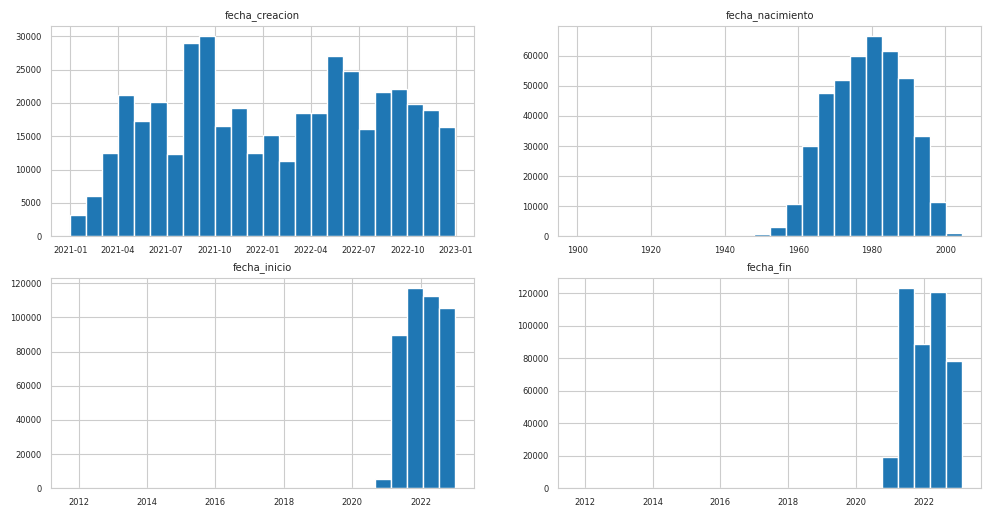

In [117]:
pd.plotting.register_matplotlib_converters()

figure, axis = plt.subplots(2, 2, figsize=(12, 6))

axis[0, 0].hist(relev_df['fecha_creacion'], bins=24)
axis[0, 0].set_title("fecha_creacion")

axis[0, 1].hist(relev_df['fecha_nacimiento'], bins=24)
axis[0, 1].set_title("fecha_nacimiento")

axis[1, 0].hist(relev_df['fecha_inicio'], bins=24)
axis[1, 0].set_title("fecha_inicio")

axis[1, 1].hist(relev_df['fecha_fin'], bins=24)
axis[1, 1].set_title("fecha_fin")



#### i) fecha_creacion

Se conocía de antemano que el dataset correspondía a solicitudes realizadas durante un período de dos años, y esto se comprueba en el histograma.

> No se detectan valores atípicos

#### ii) fecha_nacimiento

Este campo debería reflejar la fecha de nacimiento de los solicitantes al momento de realizar la solicitud de licencia; si se considera que los solicitantes son trabajadores que cumplen con las leyes argentinas, el rango de edad de los solicitantes incluidos en el dataset deberían tener una edad entre 18 y 65 años, es decir una fecha de nacimiento posterior a enero de 1955 (65 años antes a la menor fecha de creación del dataset), y anterior a diciembre de 2004 (18 años antes a la mayor fecha de creación del dataset).

También se considera que en el punto 2.a) se realizó una transformación de la variable (conversión a tipo datetime), pero como también pudo comprobarse en el punto 3) no hay valores faltantes en la columna, por lo tanto no hay riesgo de que la transformación haya introducido valores atípicos.

Se comprueba observando valores mínimos y máximos y presentándolos de manera ordenada que hay valores atípicos.

> Se detectan valores atípicos anteriores a la fecha de nacimiento más antigua posible.

Se recomienda **investigar con el proveedor del dataset si existe alguna otro atributo en la base de datos (como por ejemplo el número de documento del solicitante) que permita inferir la fecha de nacimiento**. Si no es así, se recomienda **anular los valores para el dato *fecha_nacimiento* y luego imputarles un valor utilizando algún estadístico**.

In [120]:
print("Valor mínimo: ", relev_df['fecha_nacimiento'].min(), " , Valor máximo: ", relev_df['fecha_nacimiento'].max())
relev_df['fecha_nacimiento'].sort_values()

Valor mínimo:  1900-02-16 00:00:00  ,Valor máximo:  2004-07-01 00:00:00


144059   1900-02-16
328115   1900-02-20
281960   1900-02-24
207866   1900-03-05
194687   1900-03-10
            ...    
319791   2003-11-14
177287   2003-11-26
422354   2003-11-29
198063   2004-06-19
137383   2004-07-01
Name: fecha_nacimiento, Length: 430081, dtype: datetime64[ns]

#### iii) fecha_inicio

Este campo debería reflejar el inicio de las licencias médicas aprobadas; si se considera que las solicitudes del dataset tienen fecha de creación a partir de enero de 2021 y hasta diciembre de 2022, las fechas de inicio de licencias aprobadas deberían ser cercanas a las fechas de creación.
Se entiende que la fecha de inicio de una licencia puede ser anterior a la fecha de creación de la solicitud (es posible que una licencia médica se haya aprobado usando un canal de comunicación diferente al sistema de gestión de licencias, y que la carga de la misma se haya realizado a posteriori). Aún así, y dando un período de seguridad de seis meses entre el inicio de la licencia y el registro de la misma, se observan fechas de inicio que no corresponden a los valores esperados.

También se considera que en el punto 2.a) se realizó una transformación de la variable (conversión a tipo datetime), pero como también pudo comprobarse en el punto 3) no hay valores faltantes en la columna, por lo tanto no hay riesgo de que la transformación haya introducido valores atípicos.

Esto se comprueba observando valores mínimos y máximos y presentándolos de manera ordenada.

> Se detectan valores atípicos anteriores a la fecha de creación más antigua (aún considerando el período de seguridad de seis meses)

Se recomienda **investigar con el proveedor del dataset si las fechas de inicio de licencias detectadas como valores atípicos corresponden a casos reales o no**. 

In [119]:
print("Valor mínimo: ", relev_df['fecha_inicio'].min(), " , Valor máximo: ", relev_df['fecha_inicio'].max())
relev_df['fecha_inicio'].sort_values()

Valor mínimo:  2011-10-06 00:00:00  ,Valor máximo:  2022-12-30 00:00:00


135272   2011-10-06
21063    2017-02-09
23555    2017-10-25
284239   2019-02-23
283835   2020-01-07
            ...    
112548   2022-12-30
113723   2022-12-30
92416    2022-12-30
249023   2022-12-30
227275   2022-12-30
Name: fecha_inicio, Length: 430081, dtype: datetime64[ns]

#### iv) fecha_fin

Este campo debería reflejar el fin de las licencias médicas aprobadas. 

Se desconoce si existe un límite máximo en la cantidad de días de licencia que pueden otorgarse; también se desconoce si se registran solicitudes de licencias que ya hayan finalizado (fecha de creación mayor a la fecha de fin de la misma); aún así, y tal como se analizó para el dato *fecha_inicio*, se considera que si las solicitudes del dataset tienen fecha de creación a partir de enero de 2021 y hasta diciembre de 2022, entonces las fechas de fin de licencias aprobadas deberían ser cercanas a las fechas de creación.
Si se mantiene el supuesto del punto anterior que la fecha de inicio de una licencia puede ser anterior a la fecha de creación de la solicitud con un período de seguridad de seis meses entre el inicio de la licencia y el registro de la misma, entonces las fechas de finalización también deberían cumplir ese criterio.

También se considera que en el punto 2.a) se realizó una transformación de la variable (conversión a tipo datetime); pero, aunque hay un solo valor faltante en la columna como pudo verse en el punto 3), la conversión aplicada no modificó el valor nulo, por lo tanto no hay riesgo de que la transformación haya introducido valores atípicos.

No obstante, y a pesar de todas las consideraciones realizadas, se observan fechas de fin que no corresponden a los valores esperados.

Esto se comprueba observando valores mínimos y máximos y presentándolos de manera ordenada.

> Se detectan valores atípicos anteriores a la fecha de creación más antigua

Se recomienda **investigar con el proveedor del dataset si las fechas de inicio de licencias detectadas como valores atípicos corresponden a casos reales o no**. 

In [128]:
print("Valor mínimo: ", relev_df['fecha_fin'].dropna().min(), " , Valor máximo: ", relev_df['fecha_fin'].dropna().max())
relev_df['fecha_fin'].dropna().sort_values()

Valor mínimo:  2011-10-17  ,Valor máximo:  2023-02-19


135272    2011-10-17
21063     2017-02-09
23555     2017-10-31
284239    2019-03-04
283835    2020-01-27
             ...    
314390    2023-01-30
137517    2023-01-30
132147    2023-01-31
339088    2023-02-03
377357    2023-02-19
Name: fecha_fin, Length: 430080, dtype: object

### b) Variables numéricas de tipo entero

Las variables numéricas de tipo entero que se analizarán son: *dias_solicitados* y *dias_aprobados*. 

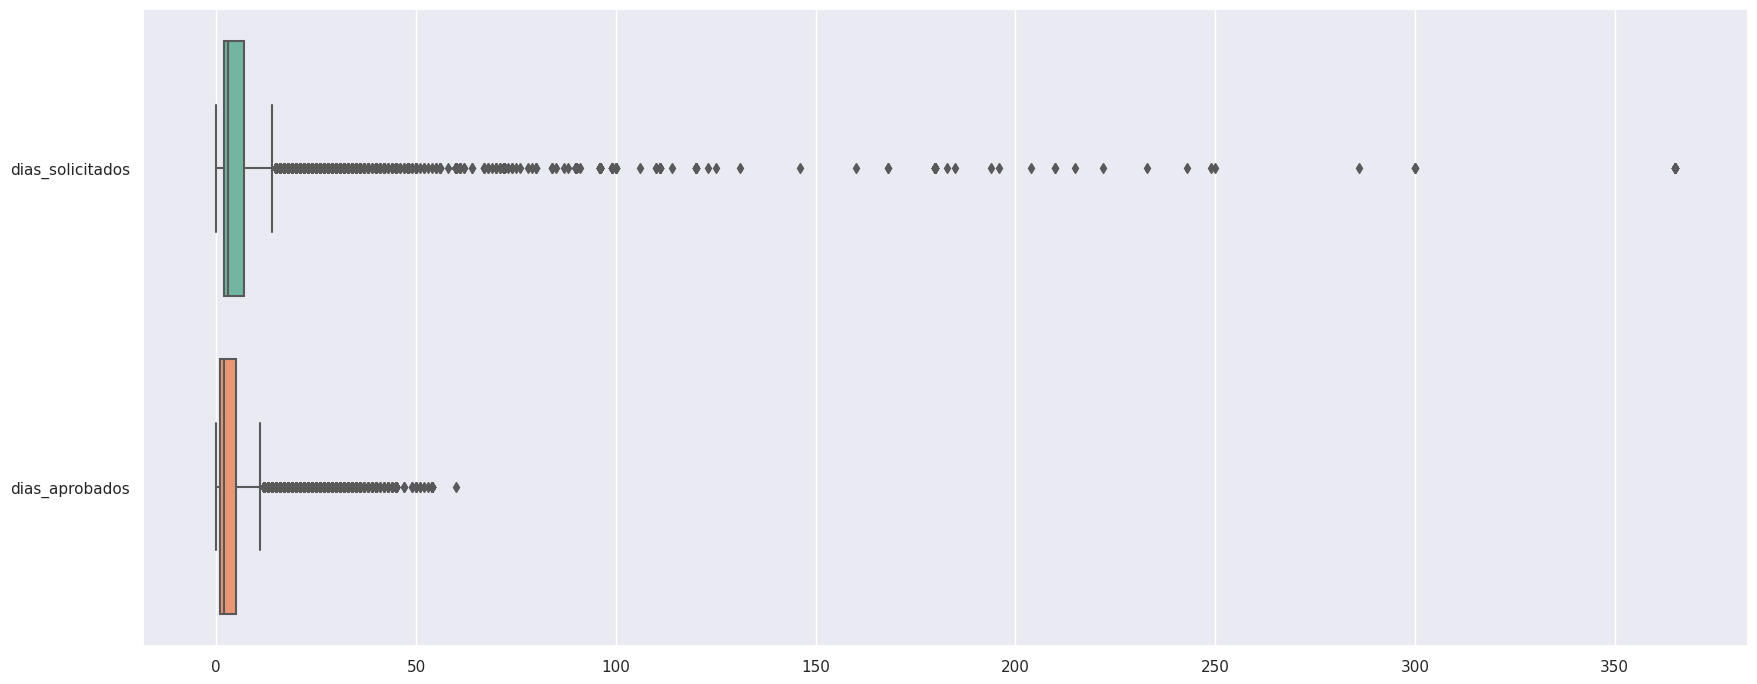

In [135]:
sns.boxplot(relev_df[['dias_solicitados', 'dias_aprobados']], orient="h", palette="Set2")
sns.set(rc={'figure.figsize':(20,5)})

Las distribuciones de las dos variables están sesgadas a la derecha, y si bien hay valores alejados que analíticamente podrían considerarse como atípicos (distancias mayores a 3 veces el rango inter-cuartílico desde el percentil Q3), se desconoce si existe un límite máximo en la cantidad de días de licencia que pueden solicitarse y aprobararse.

> Se detectan valores atípicos (desde el punto de vista analítico)

Se recomienda **investigar con el proveedor del dataset si las cantidades de días solicitadas y aprobadas detectadas como valores atípicos corresponden a casos reales o no**. 